# Homework 2 - Multi-Layer Perceptron 



# Task 01 - Builing your data set

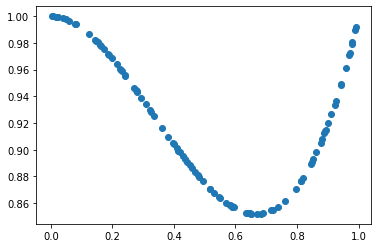

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# 1. 100 random numbers between 0 and 1 = input values
x = np.random.rand(100,1)

# 2. calculate targets
t = np.asarray([val**3 - val**2 + 1 for i,val in enumerate(x)])

# Optional: Plot data along underlying function
plt.plot(x, t, 'o')
plt.show()

# Task 02 - Perceptrons


In [2]:
# 1. Layer class with constructor instantiating bias vector, weight matrix and layer inputs + (pre)activation
class Layer:
    def __init__(self, input_units, n_units):
        
        # init bias and weight 
        self.bias = np.zeros((1, n_units))
        self.weight = np.random.rand(input_units, n_units)
        
        # init layer parameters
        self.layer_input = None
        self.layer_preactivation = None
        self.layer_activation = None
      

    # 2. method returning each unit’s activation using ReLu as the activation function.
    def forward_step(self, data_in):

        # assign data input to layer_input variable
        self.layer_input = data_in  

        #perform matrix multiplication and add bias
        matrix_mult = self.layer_input @ self.weight + self.bias

        # sum up the the columns to get the preactivation of te layer and assign it to variable
        matrix_mult = [sum(x) for x in zip(*matrix_mult)]
        self.layer_preactivation = np.transpose(matrix_mult) 

        # compute the unit layer activation using  ReLu and store into variable
        unit_activation = np.zeros(self.layer_preactivation.shape)   
        for i, val in enumerate(self.layer_preactivation):
          relu = max(0.0, val)
          unit_activation[i] = relu

        self.layer_activation = unit_activation 
        return unit_activation


    # 3. method: updates each unit’s parameters (i.e. weights and bias) 
    def backward_step(self, targ):

        # compute the preativations derivative
        ReLU_preactivation_der = np.zeros(self.layer_preactivation.shape)
        for ind, val in enumerate(self.layer_preactivation):
            if val <= 0:
                ReLU_preactivation_der[ind] = 0.0
            else:
                ReLU_preactivation_der[ind] = 1.0

        # compute the weights gradients
        grad_w = np.zeros(self.weight.shape)
        for i in range(len(self.layer_input)):
          for j in range(len(self.layer_activation)):
            grad_w[i,j] = self.layer_input[i] * ReLU_preactivation_der[j] * (self.layer_activation[j] - t[i])

        # compute the gradients of biases and inputs
        grad_b = ReLU_preactivation_der * (self.layer_activation - t[i])
        grad_i =  (grad_b) @ np.transpose(self.weight)
        
        #update weights and bias
        self.weight = self.weight - 0.01 * grad_w
        self.bias = self.bias - 0.01 * grad_b

        return grad_i

# Task 03 - Multi-Layer Perceptron


In [3]:
# MLP class
class MLP:
    def __init__(self, input_units, n_units, n_layers):

        # initialize a the MLP -> put it into an array storing each layer
        self.layers = []   
        for i in range(n_layers):
            self.layers.append(Layer(input_units[i], n_units[i]))


    # method passing input through entire network
    def forward_step(self, data_in):
      inp = data_in
      for layer in self.layers:
        inp = layer.forward_step(inp)
      return inp


    # backpropagation method updating all weights and biases given a loss
    def backpropagation(self, loss):  
      prev_layer_act = loss 
      for lay in reversed(self.layers):
        prev_layer_act = lay.backward_step(prev_layer_act)
        

# Task 04 - Training


In [4]:
# 1. MLP: hidden layer (10 units), output layer (1 unit)

# define variables
n_in = 1
u_hidLay = 10
u_outLay = 1
lay_count = 2
epochs = 1000

# create MLP
mlp = MLP([n_in, u_hidLay], [u_hidLay, u_outLay], lay_count)

# variable svaing the losses
loss_list = np.zeros((epochs, len(x)))

# 2. train MLP for 1000 epohs calulating the losses 
for i in range(epochs):

  # show every datapoint per epoch, one at a time
  for j in range(len(x)):
    out = mlp.forward_step(x[j])
    # calculate losses
    mse = 1/2*(out - t[j])**2
    mlp.backpropagation(mse)
    loss_list[i, j] = mse


# Task 05 - Visualization


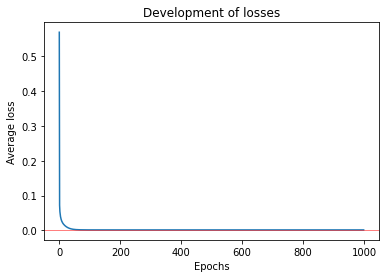

In [5]:
# variable saving the average losses per epoch
av_losses = []

# compute average losses per epoch
for i in range(epochs):
  epoch_mean = loss_list[i].mean()
  av_losses.append(epoch_mean)
  
# plot average losses over epochs
plt.plot(av_losses);
plt.axhline(y=0, xmin=0, xmax=1000, color='red',linewidth=0.5)
plt.xlabel('Epochs');
plt.ylabel('Average loss');
plt.title('Development of losses');